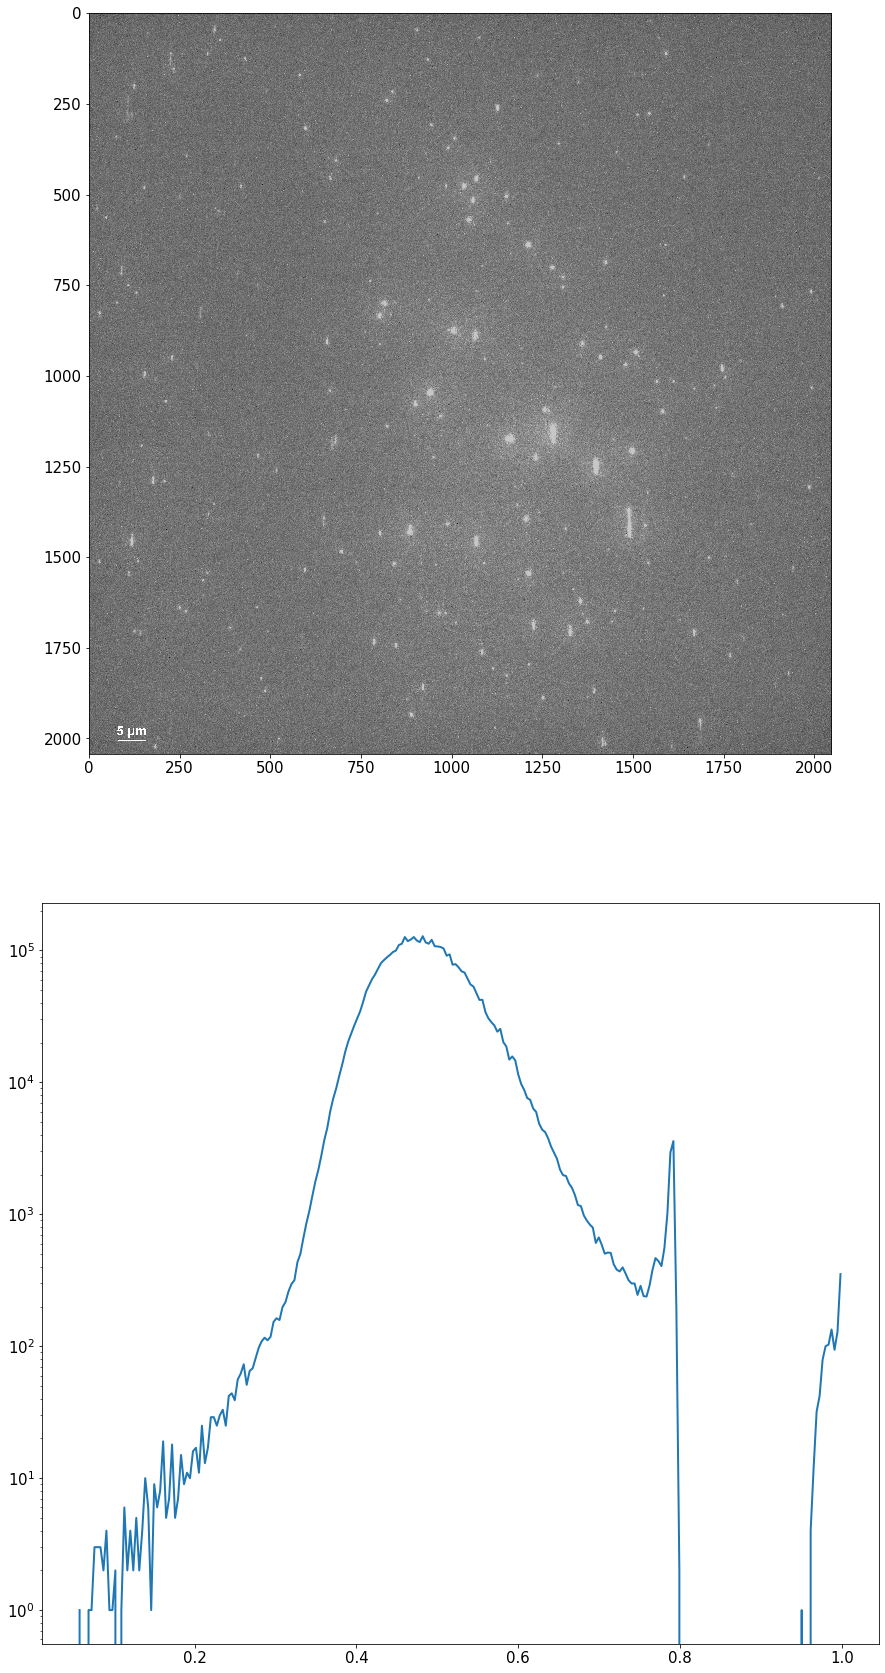

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from skimage.exposure import histogram
from skimage.color import rgb2gray
%matplotlib inline

image = Image.open('Raw data_All images/10k_27 images/minimum/Device3_During10kFlow_Area3.jpg')
img_array = np.array(image)
image_gray = rgb2gray(img_array)
hist, hist_centers = histogram(image_gray)

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(2, 1, figsize=(15, 30))
axes[0].imshow(image_gray, cmap=plt.cm.gray)
plt.yscale('log')
axes[1].plot(hist_centers, hist, lw=2)

In [18]:
from pylab import *
from skimage.filters import threshold_yen
from skimage.filters import threshold_minimum
from skimage.filters import threshold_triangle

from skimage.data import camera
image = image_gray
thresh = threshold_minimum(image)
binary = image <= thresh
plt.figure(figsize = (200,200))
imshow(binary,cmap=plt.cm.gray)

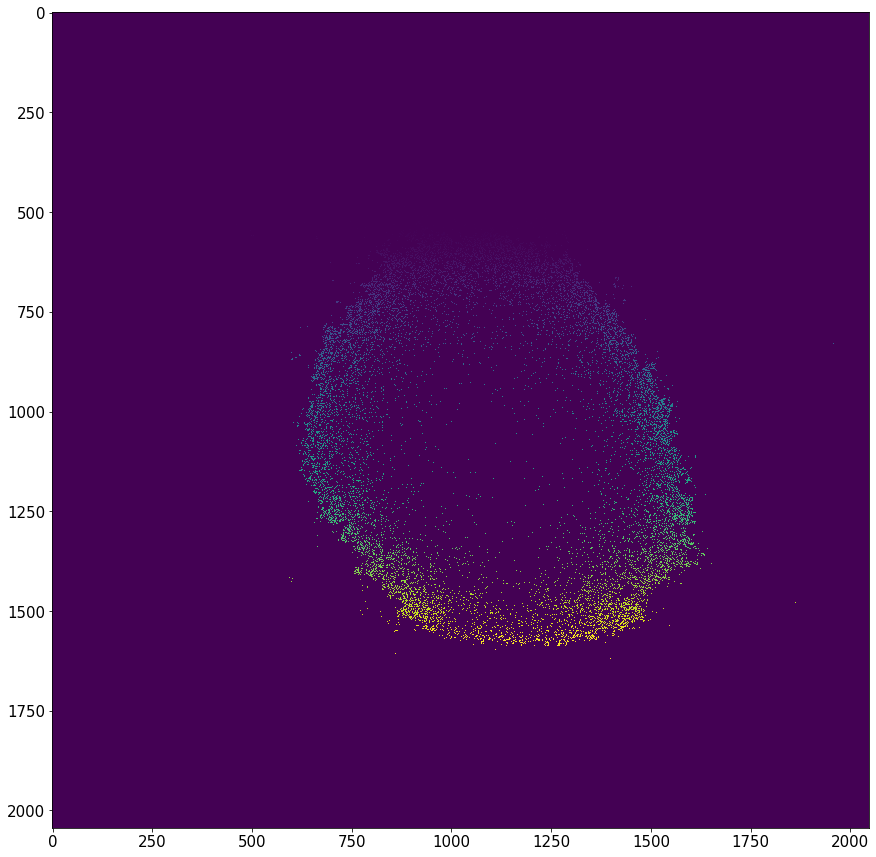

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *
from pathlib import Path
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.color import label2rgb

label_image = label(binary)
image_label_overlay = label2rgb(label_image, image=image)
fig, ax = plt.subplots(figsize=(15, 15))
#ax.imshow(image_label_overlay)
ax.imshow(label_image)

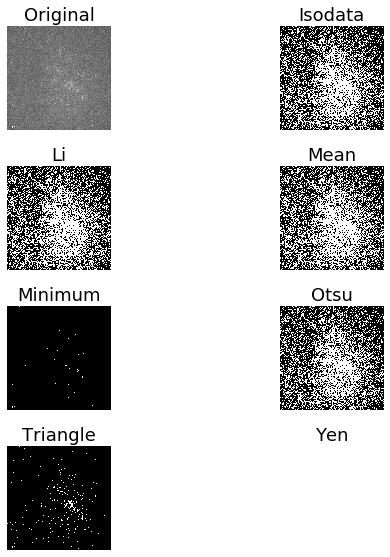

In [7]:
import matplotlib
import matplotlib.pyplot as plt

from skimage.filters import try_all_threshold

img = image_gray

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.color import rgb2gray

image = Image.open('Raw data_All images/0k_33 images/5k_15sec_off.jpg')
img_array = np.array(image)
image_gray = rgb2gray(img_array)

# crop out scale bar
width, height = image.size
left = 0
top = 0
right = width
bottom = height-100
im1 = image.crop((left, top, right, bottom)) 
im1.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

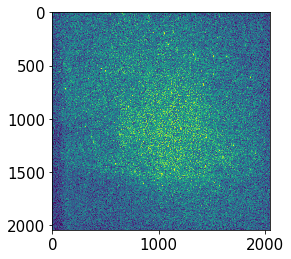

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

image = Image.open('Raw data_All images/10k_27 images/D1_Area1_10kflow10seconds.jpg')
img_array = np.array(image)
image_gray = rgb2gray(img_array)

img_adapteq = exposure.equalize_adapthist(image_gray)
imshow(img_adapteq)

In [17]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio


original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.12
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

im_bayes = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)
im_visushrink = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est, rescale_sigma=True)

# VisuShrink is designed to eliminate noise with high probability, but this
# results in a visually over-smooth appearance.  Repeat, specifying a reduction
# in the threshold by factors of 2 and 4.
im_visushrink2 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2, rescale_sigma=True)
im_visushrink4 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4, rescale_sigma=True)

ModuleNotFoundError: No module named 'skimage.metrics'

In [1]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

2019-12-05 07:07:27,339 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012
2019-12-05 07:07:28,755 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2019-12-05 07:07:29,883 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2019-12-05 07:07:31,212 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [2]:
print(target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [7]:
from sklearn import preprocessing

shear_rate = np.array([0,10000,20000,25000,30000,40000,50000,90000])
n_classes = shear_rate.shape[0]

le = preprocessing.LabelEncoder()
le.fit(shear_rate)

list(le.classes_)

le.transform(shear_rate)

list(le.inverse_transform([7, 2, 1]))

[90000, 20000, 10000]